In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from xmitgcm import open_mdsdataset, utils
from MITgcmutils import rdmds,wrmds
import ecco_v4_py as ecco
import pych.ecco as pe
import pych
from datetime import datetime,timedelta

In [2]:
# messed up the mask sign...
euc  =  np.squeeze(rdmds('../mdsfiles/verify/euc_out.01.0000000001'))

In [3]:
ntime = len(euc)
ecco_time = np.array([np.datetime64(x) for x in datetime(1992,1,1,12)+(np.arange(ntime)+1)*timedelta(hours=1)])

In [4]:
eds = xr.Dataset()
eds['time'] = xr.DataArray(ecco_time,coords={'time':ecco_time},dims=('time',))

In [5]:
eds['euc'] = xr.DataArray(euc,coords=eds.time.coords,dims=eds.time.dims,
                          attrs={'description':'Hourly EUC',
                                 'Depth':'0-400m',
                                 'lon':'140W',
                                 'lat':'Averaged between 8 grid cells from 1.5S to 1.5N ',
                                 'lat':'0N',
                                 'units':'m^3/s'})

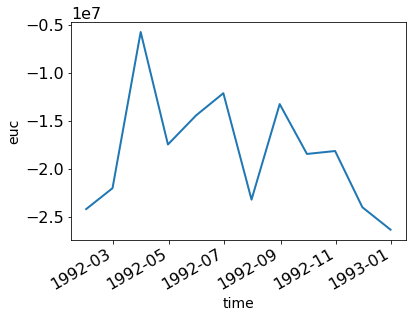

In [6]:
eds.euc.resample({'time':'1m'}).mean().plot()

In [7]:
mbar = rdmds('../mdsfiles/verify/m_horflux_vol.0000000129')

In [8]:
yo = np.nansum(np.nansum(mbar,axis=2),axis=1)

In [9]:
yo

array([-24139249.       , -21970620.125    ,  -5770916.84375  ,
       -17437560.59375  , -14418782.0234375, -12118732.75     ,
       -23155988.125    , -13247491.0546875, -18420062.       ,
       -18116063.875    , -23948299.5      , -26274173.75     ])

In [10]:
len(yo)

12

In [11]:
months = eds.euc.time.resample({'time':'1m'}).mean()

In [12]:
months = eds.euc.resample({'time':'1m'}).mean().time

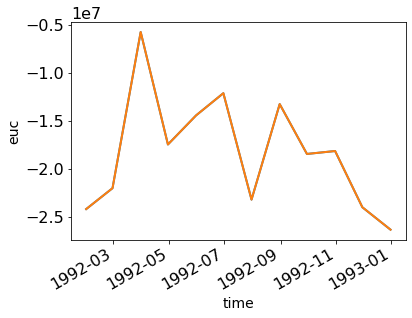

In [13]:
eds.euc.resample({'time':'1m'}).mean().plot()
plt.plot(months[:len(yo)],yo)